<a href="https://colab.research.google.com/github/Amol9934/project-collab/blob/main/Loan_Status_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')

Data collection and processing


In [ ]:
# loading the dataset to panda DataFrame
loan_dataset = pd.read_csv('/content/data.csv')

In [ ]:
type(loan_dataset)

pandas.core.frame.DataFrame

In [ ]:
# printing the first 5 rows of the dataframe
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [ ]:
# number of rows and columns
loan_dataset.shape

(381, 13)

In [ ]:
# statistical measures
loan_dataset.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


In [ ]:
# number of missing values in each column
loan_dataset.isnull().sum()

,0
Loan_ID,0
Gender,5
Married,0
Dependents,8
Education,0
Self_Employed,21
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,11


In [ ]:
# dropping the missing values
loan_dataset = loan_dataset.dropna()

In [ ]:
# number of missing values in each column
loan_dataset.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
#level encoding
loan_dataset.replace({"Loan_status":{'N':0,'Y':1}},inplace=True)

In [ ]:
# printing the first 5 rows of the dataframe
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [ ]:
# Dependent column values
loan_dataset["Dependents"].value_counts()

,count
Dependents,
0,194
2,47
1,43
3+,24


In [ ]:
# replacing the value of 3+ to 4
loan_dataset = loan_dataset.replace(to_replace='3+', value=4 )

In [ ]:
# dependent values
loan_dataset["Dependents"].value_counts()

,count
Dependents,
0,194
2,47
1,43
4,24


# Data visualization

<Axes: xlabel='Education', ylabel='count'>

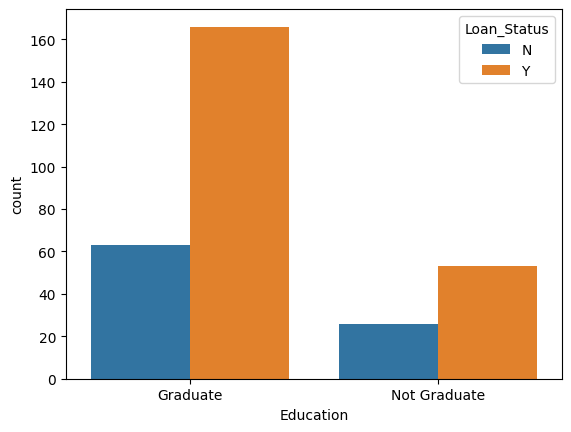

In [ ]:
# education & Loan Status
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset)

<Axes: xlabel='Married', ylabel='count'>

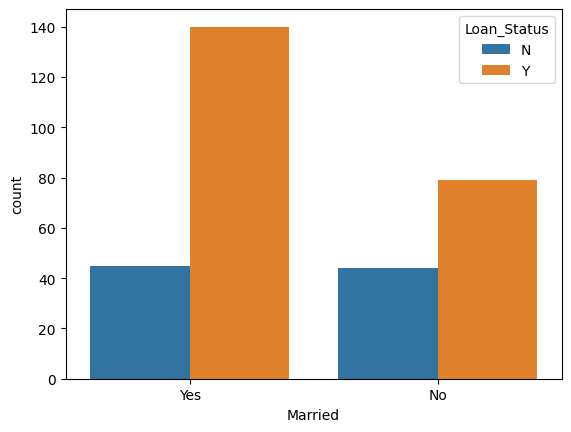

In [ ]:
# marital status & loan status
sns.countplot(x='Married',hue='Loan_Status',data=loan_dataset)

In [ ]:
# convert categorical columns to numerical values
loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},'property_area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [ ]:
loan_dataset.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,1,1,0,0,0,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [ ]:
# separating the data and lebel
X=loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y=loan_dataset['Loan_Status']

In [ ]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        1          1          1              0             4583   
1         1        1          0          1              1             3000   
2         1        1          0          0              0             2583   
3         1        0          0          1              0             6000   
4         1        1          0          0              0             2333   
..      ...      ...        ...        ...            ...              ...   
376       1        1          4          1              0             5703   
377       1        1          0          1              0             3232   
378       0        0          0          1              0             2900   
379       1        1          4          1              0             4106   
380       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

# Train Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(308, 11) (277, 11) (31, 11)


Traning the model:
# Support vector Machine Model

In [ ]:
# Assuming X_train and Y_train have categorical values
# Convert categorical variables in X_train to numerical using one-hot encoding
X_train = pd.get_dummies(X_train, drop_first=True)

# If Y_train is categorical, convert it to numerical using factorization
if Y_train.dtype == 'object':
    Y_train = pd.factorize(Y_train)[0]

# Fit the SVM model

classifier = svm.SVC(kernel='linear')

In [ ]:
# trainning the support Vector machine model
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

# Model Evaluation

In [ ]:
# accuracy score on trainning data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print("Accuracy on training data: ",training_data_accuracy)


Accuracy on training data:  0.8303249097472925


In [ ]:
# accuracy score on trainning score
classifier.fit(X_train, Y_train)

# Make predictions on test data
X_test_prediction = classifier.predict(X_test)

# Check shapes of Y_test and predictions
print(X_test_prediction.shape, Y_test.shape)

# Calculate accuracy score
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print("Accuracy on test data:", test_data_accuracy)

NameError: name 'classifier' is not defined